In [2]:
import mxnet as mx
import cmath
import numpy as np

In [100]:
# Declare input values in mxnet type
w0 = mx.symbol.Variable('w0')
x0 = mx.symbol.Variable('x0')
w1 = mx.symbol.Variable('w1')
x1 = mx.symbol.Variable('x1')
w2 = mx.symbol.Variable('w2')

# Form expression using overloaded +,-,*, and / operators
# Use special mx methods to achieve other operations
s = 1/(1 + (mx.symbol.pow(cmath.e, -1*(w0*x0 + w1*x1 + w2))))

# Specify inputs we declared 
args={'x0': mx.nd.array([-1.0]),
      'x1': mx.nd.array([-2]),
      'w0': mx.nd.array([2.0]),
      'w1': mx.nd.array([-3.0]),
      'w2': mx.nd.array([-3.0])
     }

# Bind to symbol and create executor
c_exec = s.simple_bind(
                ctx=mx.cpu(),
                x0 = args['x0'].shape,
                x1 = args['x1'].shape,
                w0 = args['w0'].shape, 
                w1 = args['w1'].shape, 
                w2 = args['w2'].shape)

# Copy input values into executor memory
c_exec.copy_params_from(arg_params = args)

# Perform computation forward to populate outputs
c_exec.forward()

# Backpropagate to calculate gradients 
c_exec.backward(out_grads=mx.nd.array([1.0]))

for k,v in zip(s.list_arguments(),c_exec.arg_arrays): print "%20s=%.03f"% (k,v.asnumpy())
for k,v in zip(s.list_outputs(),c_exec.outputs): print "%20s=%.03f"% (k,v.asnumpy())
for k,v in zip(s.list_arguments(),c_exec.grad_arrays): print "%20s=%.03f"% ("dout/d%s"%k,v.asnumpy())
            

                  w0=2.000
                  x0=-1.000
                  w1=-3.000
                  x1=-2.000
                  w2=-3.000
 _divscalar34_output=0.731
            dout/dw0=-0.197
            dout/dx0=0.393
            dout/dw1=-0.393
            dout/dx1=-0.590
            dout/dw2=0.197


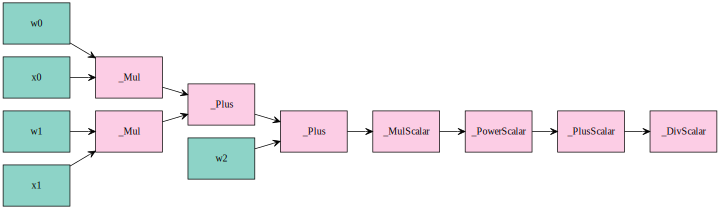

In [101]:
# Print computation graph of s.get_internals() because is shows more nodes
a = mx.viz.plot_network(s.get_internals(), shape={"w0":data_shape, 
                              "x0":data_shape,
                              "w1":data_shape,
                              "x1":data_shape,
                              "w2":data_shape},
                        node_attrs={"shape":'rect',"fixedsize":'false'})
#Rotate the graphviz object that is returned
a.body.extend(['rankdir=RL', 'size="10,5"'])

#Show it. Use a.render() to write it to disk
a